## Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.chunk import ne_chunk

plt.style.use('ggplot')

## Raw Data

In [2]:
raw = pd.read_csv("iphone_15.csv",
            delimiter= ';',
            index_col= 0,
            error_bad_lines=False)
raw.head()

C:\Users\User\AppData\Local\Temp\ipykernel_18240\2011983948.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  raw = pd.read_csv("iphone_15.csv",
Skipping line 4222: expected 16 fields, saw 17
Skipping line 4686: expected 16 fields, saw 17



,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username
created_at,,,,,,,,,,,,,,,
Tue May 30 09:37:10 +0000 2023,1663479654097772500,1663479654097772545,"transfering 15,000 iphone photos to an externa...",0,1,0,2,NaN,en,854920996792541184,1663479654097772500,1663479654097772545,NaN,NaN,vickivaliant
Tue May 30 09:15:31 +0000 2023,1663474207966232600,1663474207966232576,iPhone 15関連株で鴻海と大立光に注目 Daiwa Capital Markets\n...,0,1,0,0,NaN,ja,1005087587923419137,1663474207966232600,1663474207966232576,NaN,NaN,imaoka334
Tue May 30 09:16:09 +0000 2023,1663474367899086800,1663474367899086855,Is THIS the iPhone 15? Leaked images show desi...,0,0,0,1,NaN,en,1542021758223613952,1663474367899086800,1663474367899086855,NaN,NaN,EnsembleMsb
Tue May 30 09:12:03 +0000 2023,1663473333235748900,1663473333235748864,when is the iphone 15 coming out cause i want ...,0,0,0,0,NaN,en,1521307293500932096,1663473333235748900,1663473333235748864,NaN,NaN,jellygrrr
Tue May 30 09:28:00 +0000 2023,1663477347545411600,1663477347545411584,"In anticipation of the launch of a new model, ...",0,0,0,0,NaN,en,1632478758593781760,1663477347545411600,1663477347545411584,https://pbs.twimg.com/media/FxXXbyRWcAAGKA8.jpg,photo,hustleera


In [3]:
data = raw['full_text']
data.head()

created_at
Tue May 30 09:37:10 +0000 2023    transfering 15,000 iphone photos to an externa...
Tue May 30 09:15:31 +0000 2023    iPhone 15関連株で鴻海と大立光に注目　Daiwa Capital Markets\n...
Tue May 30 09:16:09 +0000 2023    Is THIS the iPhone 15? Leaked images show desi...
Tue May 30 09:12:03 +0000 2023    when is the iphone 15 coming out cause i want ...
Tue May 30 09:28:00 +0000 2023    In anticipation of the launch of a new model, ...
Name: full_text, dtype: object

### Main data

In [4]:
# convert to dataframe
df = pd.DataFrame(data)
df

,full_text
created_at,
Tue May 30 09:37:10 +0000 2023,"transfering 15,000 iphone photos to an externa..."
Tue May 30 09:15:31 +0000 2023,iPhone 15関連株で鴻海と大立光に注目 Daiwa Capital Markets\n...
Tue May 30 09:16:09 +0000 2023,Is THIS the iPhone 15? Leaked images show desi...
Tue May 30 09:12:03 +0000 2023,when is the iphone 15 coming out cause i want ...
Tue May 30 09:28:00 +0000 2023,"In anticipation of the launch of a new model, ..."
...,...
Wed May 17 19:10:47 +0000 2023,iPhone 15 Pro Max Triple-Lens Camera Said to D...
Wed May 17 19:25:41 +0000 2023,"Secondo gli ultimi rumor, Apple è pronta a rio..."
Wed May 17 19:20:26 +0000 2023,L'iPhone 15 Pro Max présentera une mise en pag...


In [5]:
df['ID'] = range(1, len(data) + 1)
df.head()

,full_text,ID
created_at,,
Tue May 30 09:37:10 +0000 2023,"transfering 15,000 iphone photos to an externa...",1
Tue May 30 09:15:31 +0000 2023,iPhone 15関連株で鴻海と大立光に注目 Daiwa Capital Markets\n...,2
Tue May 30 09:16:09 +0000 2023,Is THIS the iPhone 15? Leaked images show desi...,3
Tue May 30 09:12:03 +0000 2023,when is the iphone 15 coming out cause i want ...,4
Tue May 30 09:28:00 +0000 2023,"In anticipation of the launch of a new model, ...",5


In [6]:
# reset index
df_index_reseted = df.reset_index(drop=True)
df_index_reseted.head()

,full_text,ID
0,"transfering 15,000 iphone photos to an externa...",1
1,iPhone 15関連株で鴻海と大立光に注目 Daiwa Capital Markets\n...,2
2,Is THIS the iPhone 15? Leaked images show desi...,3
3,when is the iphone 15 coming out cause i want ...,4
4,"In anticipation of the launch of a new model, ...",5


In [7]:
set_index = df.set_index('ID')
set_index

,full_text
ID,
1,"transfering 15,000 iphone photos to an externa..."
2,iPhone 15関連株で鴻海と大立光に注目 Daiwa Capital Markets\n...
3,Is THIS the iPhone 15? Leaked images show desi...
4,when is the iphone 15 coming out cause i want ...
5,"In anticipation of the launch of a new model, ..."
...,...
6166,iPhone 15 Pro Max Triple-Lens Camera Said to D...
6167,"Secondo gli ultimi rumor, Apple è pronta a rio..."
6168,L'iPhone 15 Pro Max présentera une mise en pag...


In [8]:
# change the column name
rename_col = set_index.rename(columns={'full_text': 'Tweets'})
rename_col.head()

,Tweets
ID,
1,"transfering 15,000 iphone photos to an externa..."
2,iPhone 15関連株で鴻海と大立光に注目 Daiwa Capital Markets\n...
3,Is THIS the iPhone 15? Leaked images show desi...
4,when is the iphone 15 coming out cause i want ...
5,"In anticipation of the launch of a new model, ..."


In [9]:
# here we have an example of chinese word
sample_tweet = rename_col.iloc[1]
sample = sample_tweet.values
sample

array(['iPhone 15関連株で鴻海と大立光に注目\u3000Daiwa Capital Markets\\nhttps://t.co/Lsy9gvnLnF'],
      dtype=object)

### NLTK

In [10]:
# to perform good in polarity score we need to use leanguage specific sentiment liabraries such as 'Textblob'
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

SIA = SentimentIntensityAnalyzer()

In [11]:
SIA.polarity_scores(sample[0])
# here we got neutral score
# when we get into manually translate to enlish the word means:
# Focus on Hon Hai and Dai Lit Hikari on iPhone 15 related stocks\u3000Daiwa Capital Markets\fnhttps://t.co/Lsy9gvnLnF
# this is clearly just an advertisement tweets that's why it calculated as neutral

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [12]:
rename_col.values

array([['transfering 15,000 iphone photos to an external hdd this is going to take all day'],
       ['iPhone 15関連株で鴻海と大立光に注目\u3000Daiwa Capital Markets\\nhttps://t.co/Lsy9gvnLnF'],
       ['Is THIS the iPhone 15? Leaked images show designs for 4 Apple models - Daily Mail https://t.co/lGeYZMmz4L via @GoogleNews'],
       ...,
       ["L'iPhone 15 Pro Max présentera une mise en page de l'appareil photo réorganisée pour s'adapter à l'objectif du périscope https://t.co/NMD0qFyTpa... par @waxeditorial https://t.co/AJ40OuH3CL"],
       ['Como saben soy fan de la tecnología, así que les comentare los rumores más fuertes del iPhone 15 y 15 Pro... Abro hilo jeje 😜 \\n\\n#iphone15 #iphone #apple #tech #geek'],
       ['Tata Group will assemble only 5% of smartphones, while Foxconn will receive 70% of iPhone 15, iPhone 15 Pro and iPhone 15 Pro Max assembly orders, and 60% of iPhone 15 Plus orders.']],
      dtype=object)

In [13]:
rename_col.iterrows(), len(rename_col)

(<generator object DataFrame.iterrows at 0x000001FE36DBF060>, 6170)

In [14]:
# reset index
rename_col.reset_index(inplace=True)

In [15]:
result = {}

for i, row in tqdm(rename_col.iterrows(), total=len(rename_col), desc="Calculating Score"):
    text = row['Tweets']
    myid = row['ID']
    result[myid] = SIA.polarity_scores(text)

Calculating Score:   0%|          | 0/6170 [00:00<?, ?it/s]

In [16]:
result

{1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.3182},
 4: {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.0772},
 5: {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.2263},
 6: {'neg': 0.281, 'neu': 0.596, 'pos': 0.123, 'compound': -0.4003},
 7: {'neg': 0.032, 'neu': 0.968, 'pos': 0.0, 'compound': -0.128},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.101, 'neu': 0.788, 'pos': 0.111, 'compound': 0.1007},
 10: {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.112, 'neu': 0.761, 'pos': 0.127, 'compound': 0.0772},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

In [17]:
result

{1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.3182},
 4: {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.0772},
 5: {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.2263},
 6: {'neg': 0.281, 'neu': 0.596, 'pos': 0.123, 'compound': -0.4003},
 7: {'neg': 0.032, 'neu': 0.968, 'pos': 0.0, 'compound': -0.128},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.101, 'neu': 0.788, 'pos': 0.111, 'compound': 0.1007},
 10: {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3612},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.112, 'neu': 0.761, 'pos': 0.127, 'compound': 0.0772},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

In [18]:
df_result = pd.DataFrame(result).T
df_result

,neg,neu,pos,compound
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.126,0.874,0.000,-0.3182
4,0.000,0.915,0.085,0.0772
5,0.000,0.923,0.077,0.2263
...,...,...,...,...
6166,0.000,1.000,0.000,0.0000
6167,0.000,1.000,0.000,0.0000
6168,0.000,1.000,0.000,0.0000
6169,0.000,0.922,0.078,0.3182


In [19]:
value = df_result['compound']
value = pd.DataFrame(value)
value

,compound
1,0.0000
2,0.0000
3,-0.3182
4,0.0772
5,0.2263
...,...
6166,0.0000
6167,0.0000
6168,0.0000
6169,0.3182


In [20]:
# Define the threshold values
positive_threshold = 0.2
negative_threshold = -0.2

# Classify the values
value['Sentiment'] = value['compound'].apply(lambda x: 'Positive' if x > positive_threshold else 'Negative' if x < negative_threshold else 'Neutral')

In [21]:
value.head()

,compound,Sentiment
1,0.0000,Neutral
2,0.0000,Neutral
3,-0.3182,Negative
4,0.0772,Neutral
5,0.2263,Positive


In [22]:
np.unique(value['Sentiment'])

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [23]:
sentiment_counts = value['Sentiment'].value_counts()
sentiment_counts

Neutral     4608
Positive     935
Negative     627
Name: Sentiment, dtype: int64

### Bar Plot

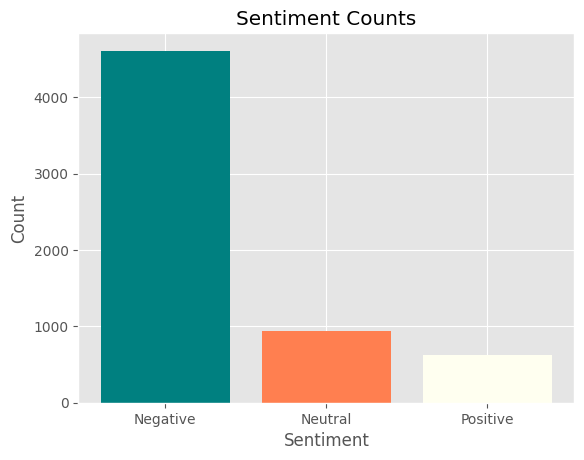

In [24]:
sentiments = np.unique(value['Sentiment'])
colors = ['Teal', 'Coral', 'Ivory']

plt.bar(sentiments, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')
plt.show()